# Machine Learning Final Exam, Aug Semester, 2019

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Generate 200 2D points from each of 2 Guassians with distributions shaped roughly as shown in the diagram below, with class 1 as the 'X's and class 2 as the 'O's. Plot the resulting 400 points with different colors for each Gaussian.

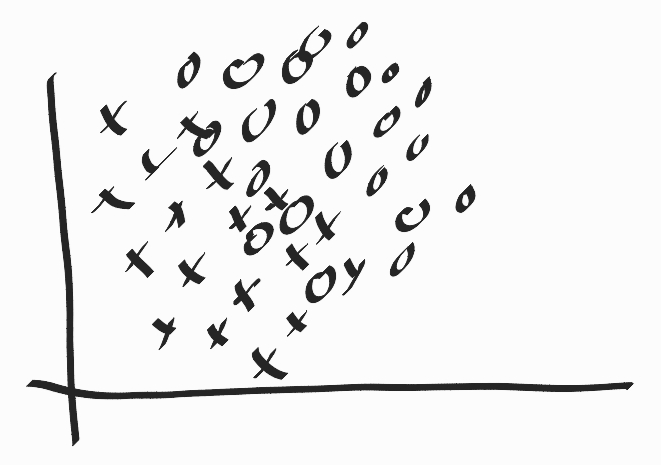


## Question 2 (20 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

## Question 3 (20 points)

Do the following:
1. Use the SVM code developed in class to fit linear SVMs to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane), and plot validation set accuracy as a function of c.
2. Explain which model is best and why.

## Question 4 (20 points)

Do the following:
1. Use the SVM code developed in class to fit SVMs with the RBF kernel to the training data from Question 2. Use several different values of hyperparameter c (the tolerance to points crossing the hyperplane) and gamma (the basis function width), and plot validation set accuracy as a function of c and gamma.
2. Explain which model is best and why.

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.



### Q1

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(mu1, Sigma1, mu2, Sigma2):
    X1 = np.random.multivariate_normal(mu1, Sigma1, 200)
    y1 = np.zeros((200,1))
    X2 = np.random.multivariate_normal(mu2, Sigma2, 200)
    y2 = np.ones((200,1))
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((y1, y2), 0)
    return X, y

In [114]:
mu1 = [2, 2]
Sigma1 = [[4, 0], [0, 4]]
mu2 = [7, 7]
Sigma2 = [[4, 0], [0, 4]]
X, y = generate_data(mu1, Sigma1, mu2, Sigma2)

In [115]:
X[0:5,:], y[0:5]

(array([[ 4.07587124, -2.43888467],
        [ 2.15492313, -1.06597206],
        [-0.62458517,  5.30571343],
        [ 2.81252687,  2.83392561],
        [ 0.42661293,  4.87013269]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

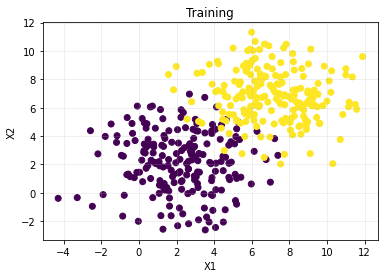

In [116]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Training')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(axis='both', alpha=.25)

In [117]:
#Standardize
XX = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)

In [118]:
XX[0:5,:]

array([[-0.17991885, -2.27306516],
       [-0.78866976, -1.8234613 ],
       [-1.6694995 ,  0.26314957],
       [-0.5802743 , -0.54631589],
       [-1.33637348,  0.12050482]])

In [119]:
import random
random.seed(12)

percent_train = .8

# Partion data into training and test datasets
m, n = X.shape

y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:]
X_test = XX[test_idx,:]

y_train = y[train_idx]
y_test = y[test_idx]

In [120]:
#Augment
X_train_aug = np.insert(X_train, 0, 1, axis=1)
X_test_aug = np.insert(X_test, 0, 1, axis=1)

In [121]:
X_train_aug[0:5,:]

array([[ 1.        , -1.35051745, -0.90724373],
       [ 1.        ,  0.64465558,  1.96008509],
       [ 1.        , -0.37479813, -1.49928477],
       [ 1.        , -1.23170869, -0.55229393],
       [ 1.        , -0.18244111, -0.97559682]])

In [122]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0] 
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad #grad_j use y-h not h-y so addition
        j_history.append(cost)
    return theta, j_history

def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [123]:
m,n = X_train_aug.shape

# Declare alpha
alpha = .01

# Initialize theta
theta_initial = np.zeros((n, 1))                       

# Number of iterations
num_iters = 1000

theta, j_history = train(X_train_aug, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-0.03484385]
 [ 1.37608176]
 [ 1.35944529]]
Cost with optimized theta: 0.19672144634477734


In [124]:
#Indicate the training set accuracy and validation set accuracy of the logistic regression model.

y_train_pred_soft = h(X_train_aug, theta)
#y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)
y_train_pred_hard = [1. if y > 0.5 else 0. for y in y_train_pred_soft]
train_acc = (y_train_pred_hard == y_train[:,0]).astype(int).sum() / y_train.shape[0]
print("Train accuracy:", train_acc)

y_test_pred_soft = h(X_test_aug, theta)
#y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)
y_test_pred_hard = [1. if y > 0.5 else 0. for y in y_test_pred_soft]
test_acc = (y_test_pred_hard == y_test[:,0]).astype(int).sum() / y_test.shape[0]
print("Test accuracy:", test_acc)

Train accuracy: 0.95
Test accuracy: 0.975


In [125]:
#y_train[:,0]

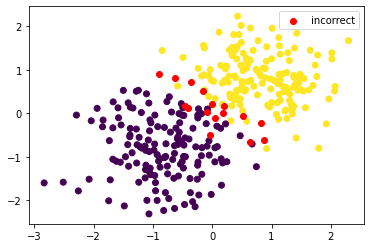

In [126]:
matched_train = np.where(y_train_pred_hard == y_train[:,0])
unmatched_train = np.where(y_train_pred_hard != y_train[:,0])
X_train_matched = X_train[matched_train[0],:]
y_train_matched = y_train[matched_train[0]]
X_train_unmatched = X_train[unmatched_train[0],:]
y_train_unmatched = y_train[unmatched_train[0]]

plt.scatter(X_train_matched[:,0], X_train_matched[:,1], c=y_train_matched)
plt.scatter(X_train_unmatched[:,0], X_train_unmatched[:,1], c='r', label='incorrect')
plt.legend()
plt.show()

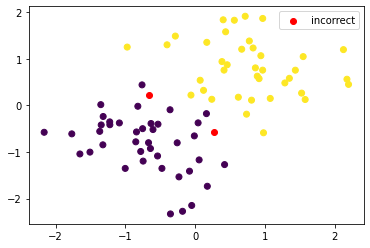

In [127]:
matched_test = np.where(y_test_pred_hard == y_test[:,0])
unmatched_test = np.where(y_test_pred_hard != y_test[:,0])
X_test_matched = X_test[matched_test[0],:]
y_test_matched = y_test[matched_test[0]]
X_test_unmatched = X_test[unmatched_test[0],:]
y_test_unmatched = y_test[unmatched_test[0]]

plt.scatter(X_test_matched[:,0], X_test_matched[:,1], c=y_test_matched)
plt.scatter(X_test_unmatched[:,0], X_test_unmatched[:,1], c='r', label='incorrect')
plt.legend()
plt.show()

### Q2

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
import cvxopt.solvers
from sklearn.model_selection import train_test_split
from numpy import linalg
import pylab as pl

In [129]:
class SVMModel:
    
    def linear_kernel(self,x1, x2):
        return np.dot(x1, x2)

    def polynomial_kernel(self,x, y, p=2):
        return (1 + np.dot(x, y)) ** p

    def gaussian_kernel(self,x, y, sigma=100):
        return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

    def fit(self, X, y, kernel, C):
        n_samples, n_features = X.shape

        # Gram matrix
        # initialize kernel matrix    
        K = np.zeros((n_samples, n_samples))
        # Kernel matrix

        for i in range(n_samples):
            for j in range(n_samples):
                if kernel == 'linear_kernel':
                    K[i,j] = self.linear_kernel(X[i], X[j])
                elif kernel == 'polynomial_kernel':
                    K[i,j] = self.polynomial_kernel(X[i], X[j])
                else:
                    K[i,j] = self.gaussian_kernel(X[i], X[j])


        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        A = cvxopt.matrix(A, (1, n_samples), 'd')
        #A = -np.eye(n_samples)
        #print(A)
        b = cvxopt.matrix(0.0)

        if C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv_idx = a > 1e-5
        ind = np.arange(len(a))[sv_idx]
        a = a[sv_idx]    
        sv = X[sv_idx]
        sv_y = y[sv_idx]
        print("%d support vectors out of %d points" % (len(a), n_samples))

        # Intercept
        b = 0
        for n in range(len(a)):
            b += sv_y[n]
            b -= np.sum(a * sv_y * K[ind[n],sv_idx])
        b /= len(a)

        # Weight vector
        if kernel == 'linear_kernel':
            w = np.zeros(n_features)
            for n in range(len(a)):
                w += a[n] * sv_y[n] * sv[n]
        else:
            w = None
        return sv, sv_y, a, w, b

    def project(self,X, kernel,sv, sv_y, a, w, b):
        if w is not None:
            return np.dot(X, w) + b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a_val, sv_y_val, sv_val in zip(a, sv_y, sv):
                    if kernel == 'polynomial_kernel':
                        s += a_val * sv_y_val * self.polynomial_kernel(X[i], sv_val)
                    else:
                        s += a_val * sv_y_val * self.gaussian_kernel(X[i], sv_val)
                y_predict[i] = s
            return y_predict + b

    def predict(self,X, kernel, sv, sv_y, a, w, b):
        return np.sign(self.project(X, kernel,sv, sv_y, a, w, b))
    
    def plot_contour(self,X1_train, X2_train, kernel, sv, sv_y, a, w, b):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(sv[:,0], sv[:,1], s=100, c="g")
        # here we choose the range between -7 and 7 as we have choosen
        # the mean to be between -4 and 4 while generating data with the variance of 0.8
        X1, X2 = np.meshgrid(np.linspace(-7,7,50), np.linspace(-7,7,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = self.project(X, kernel,sv, sv_y, a, w, b).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

In [130]:
y_train_svm = [-1 if y == 0 else 1 for y in y_train]

In [131]:
y_train_svm = np.array(y_train_svm)
y_train_svm.shape

(320,)

In [132]:
SVM_l = SVMModel()

kernel = 'linear_kernel'
C = [100.1]
sv, sv_y, a, w, b = SVM_l.fit(X_train,y_train_svm,kernel=kernel,C=C)

# X_train1 = X_train[y_train_svm==-1]
# X_train2 = X_train[y_train_svm==1]
# plt.figure(figsize=(8,8))
# SVM_l.plot_contour(X_train1, X_train2, kernel, sv, sv_y, a, w, b)

     pcost       dcost       gap    pres   dres
 0: -1.8829e+03 -2.3095e+06  6e+06  8e-01  2e-13
 1:  3.9192e+03 -6.7463e+05  1e+06  8e-02  5e-13
 2:  4.3503e+03 -1.0827e+05  1e+05  1e-02  3e-13
 3: -1.4078e+03 -1.9726e+04  2e+04  7e-04  1e-13
 4: -2.1987e+03 -9.4138e+03  7e+03  2e-04  5e-14
 5: -2.3372e+03 -8.1412e+03  6e+03  2e-04  4e-14
 6: -2.5972e+03 -5.5328e+03  3e+03  4e-05  4e-14
 7: -2.7360e+03 -5.3402e+03  3e+03  3e-05  4e-14
 8: -2.9146e+03 -4.6260e+03  2e+03  7e-06  5e-14
 9: -2.9732e+03 -4.5141e+03  2e+03  6e-06  5e-14
10: -3.1300e+03 -4.2132e+03  1e+03  3e-06  5e-14
11: -3.2073e+03 -4.0820e+03  9e+02  2e-06  4e-14
12: -3.2269e+03 -3.9227e+03  7e+02  1e-06  5e-14
13: -3.2557e+03 -3.8652e+03  6e+02  7e-07  4e-14
14: -3.3675e+03 -3.6915e+03  3e+02  3e-07  4e-14
15: -3.3725e+03 -3.6419e+03  3e+02  2e-07  5e-14
16: -3.3870e+03 -3.6160e+03  2e+02  1e-07  4e-14
17: -3.4522e+03 -3.5202e+03  7e+01  2e-08  5e-14
18: -3.4782e+03 -3.4845e+03  6e+00  1e-09  6e-14
19: -3.4810e+03 -3.48

In [133]:
y_test_svm = [-1 if y == 0 else 1 for y in y_test]
y_pred = SVM_l.predict(X_test,kernel,sv,sv_y,a,w,b).astype(int)
accuracy_l = np.sum(y_test_svm == y_pred)/len(y_test_svm)
print("SVM accuracy - linear_kernel: ", accuracy_l)

SVM accuracy - linear_kernel:  0.975


In [134]:
#len(y_test_svm)

In [135]:
acc = []

kernel = 'linear_kernel'
C = [0.01, 5, 10]
for c in C:
    SVM_l = SVMModel()
    sv, sv_y, a, w, b = SVM_l.fit(X_train,y_train_svm,kernel=kernel,C=c)
    y_pred = SVM_l.predict(X_test,kernel,sv,sv_y,a,w,b).astype(int)
    accuracy_l = np.sum(y_test_svm == y_pred)/len(y_test_svm)
    acc.append(accuracy_l)

     pcost       dcost       gap    pres   dres
 0: -4.2221e+01 -5.9114e+00  2e+03  4e+01  2e-15
 1: -1.4212e+00 -5.8727e+00  3e+01  5e-01  2e-15
 2: -8.6935e-01 -4.1168e+00  4e+00  2e-02  5e-16
 3: -9.7649e-01 -1.3661e+00  4e-01  2e-03  2e-15
 4: -1.1374e+00 -1.2176e+00  8e-02  3e-04  5e-16
 5: -1.1683e+00 -1.1920e+00  2e-02  8e-05  3e-16
 6: -1.1775e+00 -1.1836e+00  6e-03  2e-05  3e-16
 7: -1.1802e+00 -1.1811e+00  8e-04  2e-06  4e-16
 8: -1.1806e+00 -1.1807e+00  1e-04  2e-07  4e-16
 9: -1.1807e+00 -1.1807e+00  2e-06  1e-09  4e-16
10: -1.1807e+00 -1.1807e+00  2e-08  1e-11  4e-16
Optimal solution found.
160 support vectors out of 320 points
     pcost       dcost       gap    pres   dres
 0: -2.4389e+02 -8.3528e+03  3e+04  1e+00  1e-14
 1: -1.6317e+02 -3.2734e+03  5e+03  1e-01  1e-14
 2: -1.1130e+02 -6.1435e+02  7e+02  2e-02  2e-14
 3: -1.3582e+02 -2.8708e+02  2e+02  4e-03  9e-15
 4: -1.4592e+02 -2.5394e+02  1e+02  2e-03  5e-15
 5: -1.5858e+02 -2.2527e+02  7e+01  9e-04  4e-15
 6: -1.66

In [136]:
acc

[0.975, 0.975, 0.975]

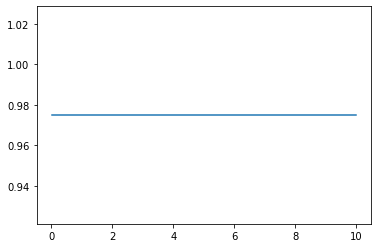

In [137]:
plt.plot(C, acc)

### Q4

In [138]:
acc = []

kernel = 'gaussian_kernel'
C = [1, 20, 30]
for c in C:
    SVM_l = SVMModel()
    sv, sv_y, a, w, b = SVM_l.fit(X_train,y_train_svm,kernel=kernel,C=c)
    y_pred = SVM_l.predict(X_test,kernel,sv,sv_y,a,w,b).astype(int)
    accuracy_l = np.sum(y_test_svm == y_pred)/len(y_test_svm)
    acc.append(accuracy_l)

     pcost       dcost       gap    pres   dres
 0: -3.0843e+02 -6.4214e+02  1e+03  1e+00  5e-15
 1: -2.5829e+02 -4.3108e+02  2e+02  2e-14  5e-15
 2: -3.0772e+02 -3.1582e+02  8e+00  4e-15  5e-15
 3: -3.1393e+02 -3.1401e+02  8e-02  2e-15  6e-15
 4: -3.1399e+02 -3.1399e+02  8e-04  7e-16  5e-15
 5: -3.1399e+02 -3.1399e+02  8e-06  4e-15  6e-15
Optimal solution found.
320 support vectors out of 320 points
     pcost       dcost       gap    pres   dres
 0: -2.6686e+03 -1.2680e+04  1e+04  1e-13  6e-14
 1: -3.3025e+03 -4.8583e+03  2e+03  6e-14  8e-14
 2: -3.8582e+03 -4.5231e+03  7e+02  3e-13  8e-14
 3: -4.1287e+03 -4.3195e+03  2e+02  4e-13  9e-14
 4: -4.2054e+03 -4.2698e+03  6e+01  5e-14  9e-14
 5: -4.2333e+03 -4.2501e+03  2e+01  8e-14  9e-14
 6: -4.2416e+03 -4.2440e+03  2e+00  4e-14  1e-13
 7: -4.2429e+03 -4.2429e+03  4e-02  7e-13  1e-13
 8: -4.2429e+03 -4.2429e+03  4e-04  4e-13  1e-13
Optimal solution found.
291 support vectors out of 320 points
     pcost       dcost       gap    pres   dr

In [139]:
acc

[0.975, 0.975, 0.975]

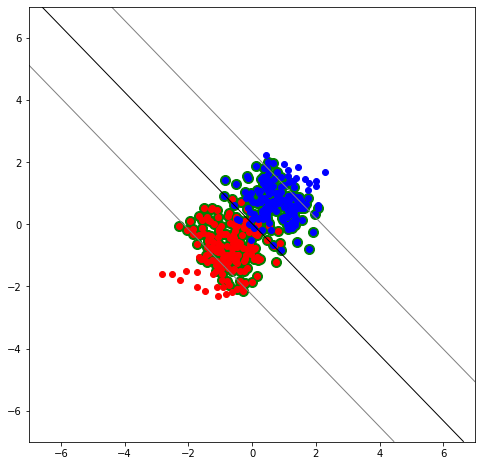

In [140]:
X_train1 = X_train[y_train_svm==-1]
X_train2 = X_train[y_train_svm==1]
plt.figure(figsize=(8,8))
SVM_l.plot_contour(X_train1, X_train2, kernel, sv, sv_y, a, w, b)

## Question 5 (20 points)

Using the neural network code you developed (based on the code from class) for the deep learning homework assignment, do the following:
1. Fit a two-layer neural network with ReLU activations in the hidden layer and a logistic output layer to the training data from Question 2. Use several different numbers of hidden units in the hidden layer, and plot validation set accuracy as a function of the number of units in the hidden layer.
2. Explain which neural network is best and why, and briefly compare the neural network to the logistic regression and SVM models developed in the previous questions.


In [141]:
# Place code to build, train, and evaluate your PyTorch model here
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [142]:
output_size = 1
#hidden1_size = 10

class LogisticRegressioNN(nn.Module):
    
    def __init__(self, input_size=2, out_size=1, layer_size=[]):
        super().__init__()        
        layerlist = []
        for i in layer_size:
            layerlist.append(nn.Linear(input_size, i))
            layerlist.append(nn.ReLU(inplace=True))
            input_size = i
        layerlist.append(nn.Linear(input_size, out_size))
        layerlist.append(nn.Sigmoid())
        
        self.layers = nn.Sequential(*layerlist)
        
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [143]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

In [51]:
layer_list = [[],[10], [10,5]]
epochs = 10000
train_losses_list = []
test_losses_list = []
train_correct_list = []
test_correct_list = []

for l in layer_list:
    #Create the model object
    torch.manual_seed(999)
    model = None
    model = LogisticRegressioNN(layer_size=l)
    #print(model)

    # Define the loss function - Binary Cross Entropy
    criterion = nn.BCELoss()

    # Define the optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    train_losses = []
    test_losses = []
    train_correct = []
    test_correct = []

    for i in range(epochs):
        trn_corr = 0
        tst_corr = 0

        # Run the training batches
        #for b, (X_train, y_train) in enumerate(train_loader):

        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
        y_train_np = y_train.numpy().reshape(1,-1)
        trn_corr = (predictions == y_train_np).sum()
        #trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss)
        train_correct.append(trn_corr)

        # Run the testing batches
        with torch.no_grad():
            #for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
            y_test_np = y_test.numpy().reshape(1,-1)
            tst_corr = (predictions == y_test_np).sum()

        val_loss = criterion(y_val, y_test)
        test_losses.append(val_loss)
        test_correct.append(tst_corr)
    
    train_losses_list.append(train_losses)
    test_losses_list.append(test_losses)
    train_correct_list.append(train_correct)
    test_correct_list.append(test_correct)

In [144]:
test_correct_list[0][-1], test_correct_list[1][-1], test_correct_list[1][-1]

(77, 78, 78)

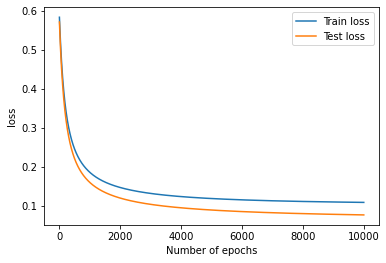

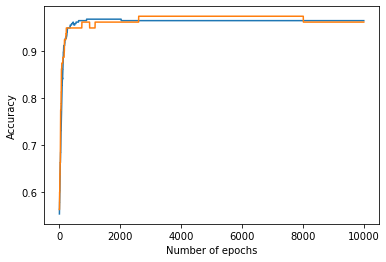

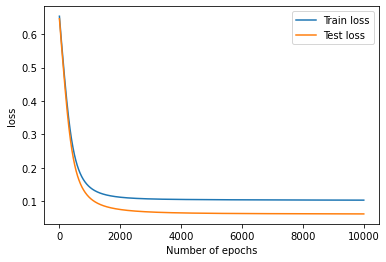

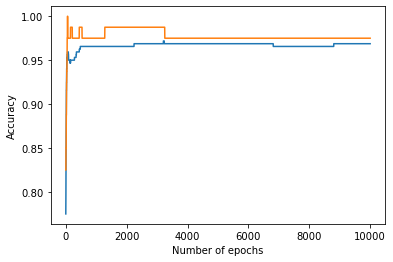

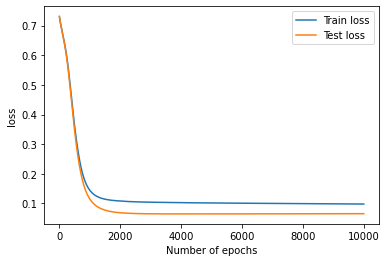

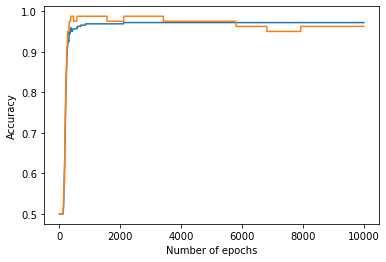

In [149]:
for i, _ in enumerate(train_losses_list):
    train_loss = [loss.item() for loss in train_losses_list[i]]
    test_loss = [loss.item() for loss in test_losses_list[i]]

    # Plot training loss
    plt.plot(train_loss, label='Train loss')
    plt.plot(test_loss, label='Test loss')
    plt.xlabel('Number of epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

    train_correct = [x/len(y_train) for x in train_correct_list[i]]
    test_correct = [x/len(y_test) for x in test_correct_list[i]]
    plt.plot(train_correct, label='Train Acc')
    plt.plot(test_correct, label='Test Acc')
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [71]:
output_size = 1

class LogisticRegressTorch1(nn.Module):
    
    def __init__(self, n_features=2):
        super().__init__()
        self.l1 = nn.Linear(n_features, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x =  self.sigmoid(x)
        return x

In [72]:
#Create the model object
torch.manual_seed(999)
model = LogisticRegressTorch1(n_features=2)

# Define the loss function - Binary Cross Entropy
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [73]:
epochs = 1000
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
        
    # Apply the model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally the number of correct predictions
    predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
    y_train_np = y_train.numpy().reshape(1,-1)
    trn_corr = (predictions == y_train_np).sum()
    #trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        #for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
        y_test_np = y_test.numpy().reshape(1,-1)
        tst_corr = (predictions == y_test_np).sum()

    val_loss = criterion(y_val, y_test)
    test_losses.append(val_loss)
    test_correct.append(tst_corr)

In [74]:
print(train_correct[-1]/len(y_train))
print(test_correct[-1]/len(y_test))

0.96875
0.95


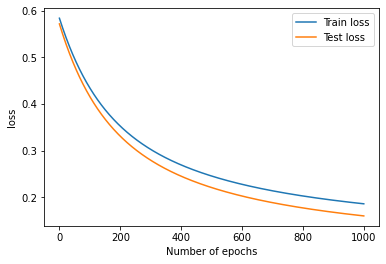

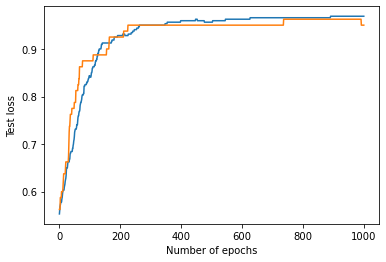

In [75]:
train_loss = [loss.item() for loss in train_losses]
test_loss = [loss.item() for loss in test_losses]

# Plot training loss
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

train_correct = [x/len(y_train) for x in train_correct]
test_correct = [x/len(y_test) for x in test_correct]
plt.plot(train_correct, label='Train Acc')
plt.plot(test_correct, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [76]:
output_size = 1
hidden1_size = 10

class LogisticRegressTorch2(nn.Module):
    
    def __init__(self, n_features=2):
        super().__init__()        
        self.l1 = nn.Linear(n_features, hidden1_size)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden1_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x =  self.sigmoid(x)
        return x

In [77]:
#Create the model object
torch.manual_seed(999)
model = LogisticRegressTorch2(n_features=2)

# Define the loss function - Binary Cross Entropy
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [78]:
epochs = 1000
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
        
    # Apply the model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally the number of correct predictions
    predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
    y_train_np = y_train.numpy().reshape(1,-1)
    trn_corr = (predictions == y_train_np).sum()
    #trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        #for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
        y_test_np = y_test.numpy().reshape(1,-1)
        tst_corr = (predictions == y_test_np).sum()

    val_loss = criterion(y_val, y_test)
    test_losses.append(val_loss)
    test_correct.append(tst_corr)

In [79]:
print(train_correct[-1]/len(y_train))
print(test_correct[-1]/len(y_test))

0.965625
0.975


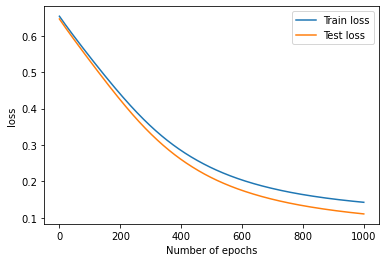

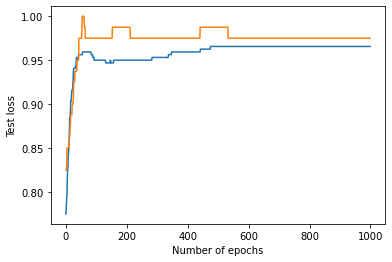

In [80]:
train_loss = [loss.item() for loss in train_losses]
test_loss = [loss.item() for loss in test_losses]

# Plot training loss
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

train_correct = [x/len(y_train) for x in train_correct]
test_correct = [x/len(y_test) for x in test_correct]
plt.plot(train_correct, label='Train Acc')
plt.plot(test_correct, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [81]:
output_size = 1
hidden1_size = 10
hidden2_size = 5

class LogisticRegressTorch3(nn.Module):
    
    def __init__(self, n_features=2):
        super().__init__()        
        self.l1 = nn.Linear(n_features, hidden1_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden1_size, hidden2_size)
        self.l3 = nn.Linear(hidden2_size, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x =  self.sigmoid(x)
        return x

In [82]:
#Create the model object
torch.manual_seed(999)
model = LogisticRegressTorch3(n_features=2)

# Define the loss function - Binary Cross Entropy
criterion = nn.BCELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [83]:
epochs = 1000
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
        
    # Apply the model
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Tally the number of correct predictions
    predictions = [1. if x > 0.5 else 0. for x in y_pred.data.numpy()]
    y_train_np = y_train.numpy().reshape(1,-1)
    trn_corr = (predictions == y_train_np).sum()
    #trn_corr += batch_corr

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        #for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test)

        # Tally the number of correct predictions
        predictions = [1. if x > 0.5 else 0. for x in y_val.data.numpy()]
        y_test_np = y_test.numpy().reshape(1,-1)
        tst_corr = (predictions == y_test_np).sum()

    val_loss = criterion(y_val, y_test)
    test_losses.append(val_loss)
    test_correct.append(tst_corr)

In [84]:
print(train_correct[-1]/len(y_train))
print(test_correct[-1]/len(y_test))

0.96875
0.9875


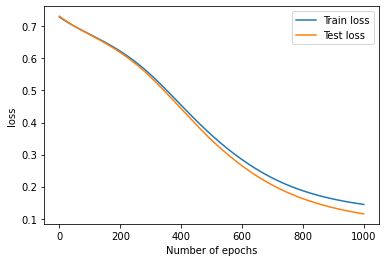

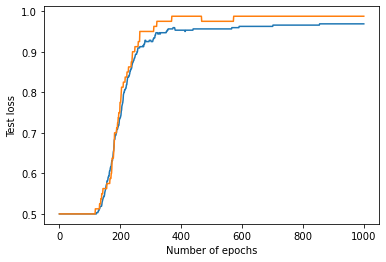

In [85]:
train_loss = [loss.item() for loss in train_losses]
test_loss = [loss.item() for loss in test_losses]

# Plot training loss
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

train_correct = [x/len(y_train) for x in train_correct]
test_correct = [x/len(y_test) for x in test_correct]
plt.plot(train_correct, label='Train Acc')
plt.plot(test_correct, label='Test Acc')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

## Question 6 (10 points)

Consider what would happen if you got the data from Question 1 *without labels* and were tasked with using unsupervised learning to model and understand the data set. Based on a quick visualization, you see that there seem to be two main clusters in the data and decide to build a $k$-means ($k$=2) or GMM for the dataset.

Obviously, a GMM would be appropriate, as the data were generated from a mixture of Gaussians in the first place. On the other hand, the $k$-means model would be simpler. Would it be as effective?

Do the following:
1. Write the parameters $\phi_1$, $\phi_2$, $\mathbf{\mu}_1$, $\mathbf{\mu}_2$, $\mathtt{\Sigma}_1$, $\mathtt{\Sigma}_2$ of the "ground truth" model used to generate the data in Question 1.
2. Briefly discuss whether, in practice, the $k$-means model would be worse than, equally good, or better than a GMM for this dataset.

In [86]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

In [91]:
k = 2
epsilon = 0.001
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion

In [92]:
#c

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

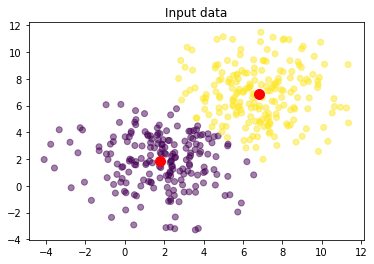

In [103]:
plt.scatter(X[:, 0], X[:, 1], c=c, alpha=0.5)
plt.scatter(means[:,0], means[:,1], c='red', s=100)
plt.title('Input data')
plt.show()

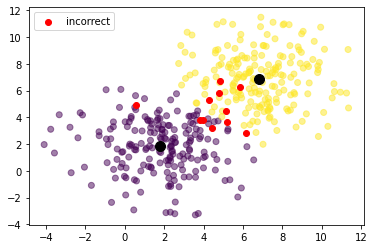

In [112]:
matched = np.where(c == y[:,0])
unmatched = np.where(c != y[:,0])
X_matched = X[matched[0],:]
y_matched = y[matched[0]]
X_unmatched = X[unmatched[0],:]
y_unmatched = y[unmatched[0]]

plt.scatter(X_matched[:,0], X_matched[:,1], c=y_matched, alpha=0.5)
plt.scatter(X_unmatched[:,0], X_unmatched[:,1], c='r', label='incorrect')
plt.scatter(means[:,0], means[:,1], c='black', s=100)
plt.legend()
plt.show()

In [108]:
len(matched[0])/y.shape[0]

0.9725

In [109]:
phi_gt = [ 0.5, 0.5]

mu_gt = [ [2,2], [7,7] ]
sigma_gt = [ np.matrix([[4, 0], [0, 4]]), np.matrix([[4, 0], [0, 4]])]
